In [1]:
import pandas as pd

In [3]:
df=pd.read_csv('wine_data.csv')

In [5]:
df

,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
173,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
174,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
175,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [7]:
## Sirf first, second, third column select karo
df = df.iloc[:, [0, 1, 2, 3]]

In [9]:
df

,1,14.23,1.71,2.43
0,1,13.20,1.78,2.14
1,1,13.16,2.36,2.67
2,1,14.37,1.95,2.50
3,1,13.24,2.59,2.87
4,1,14.20,1.76,2.45
...,...,...,...,...
172,3,13.71,5.65,2.45
173,3,13.40,3.91,2.48
174,3,13.27,4.28,2.26
175,3,13.17,2.59,2.37


In [11]:
df.columns = ['Class label', 'Alcohol', 'Malic acid', 'Drop']

In [13]:
df

,Class label,Alcohol,Malic acid,Drop
0,1,13.20,1.78,2.14
1,1,13.16,2.36,2.67
2,1,14.37,1.95,2.50
3,1,13.24,2.59,2.87
4,1,14.20,1.76,2.45
...,...,...,...,...
172,3,13.71,5.65,2.45
173,3,13.40,3.91,2.48
174,3,13.27,4.28,2.26
175,3,13.17,2.59,2.37


In [15]:
df=df[['Class label','Alcohol','Malic acid']]

In [17]:
df

,Class label,Alcohol,Malic acid
0,1,13.20,1.78
1,1,13.16,2.36
2,1,14.37,1.95
3,1,13.24,2.59
4,1,14.20,1.76
...,...,...,...
172,3,13.71,5.65
173,3,13.40,3.91
174,3,13.27,4.28
175,3,13.17,2.59


In [19]:
import seaborn as sns

KDE plot batayega ki: Kaunsi values pe peak hai (matlab zyada data wahan hai),
Aur poora distribution kis shape me spread ho raha hai.
✅ KDE Plot ka use kab karte hain?
📈 Data distribution dekhne ke liye	Kis range me data zyada clustered hai
🆚 Multiple distributions compare karne ke liye	e.g., sns.kdeplot(df[df['Class']==0]['Alcohol']) vs class 1
🎯 Outliers detect karne ke liye	Agar graph me extreme tail dikhe

🧠 Real-life analogy:
Soch tu ek group ke students ka height dekh rahi hai. KDE plot tujhe ek smooth curve se batayega:
Kaunse height pe sabse zyada students hain
Kya heights average ke around clustered hain ya kisi side me tail ban raha hai

<Axes: xlabel='Alcohol', ylabel='Count'>

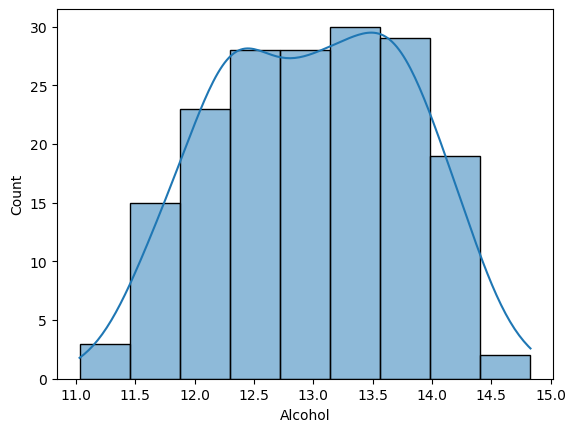

In [22]:
sns.histplot(df['Alcohol'],kde=True)

<Axes: xlabel='Malic acid', ylabel='Count'>

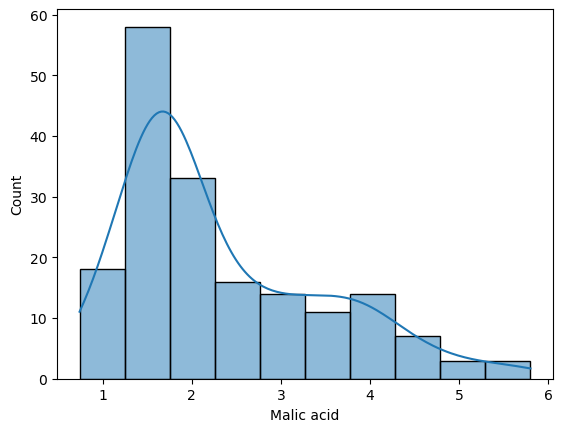

In [24]:
sns.histplot(df['Malic acid'],kde=True)

In [26]:
color_dict={
    1:'red',
    2:'green',
    3:'blue'
}

<Axes: xlabel='Alcohol', ylabel='Malic acid'>

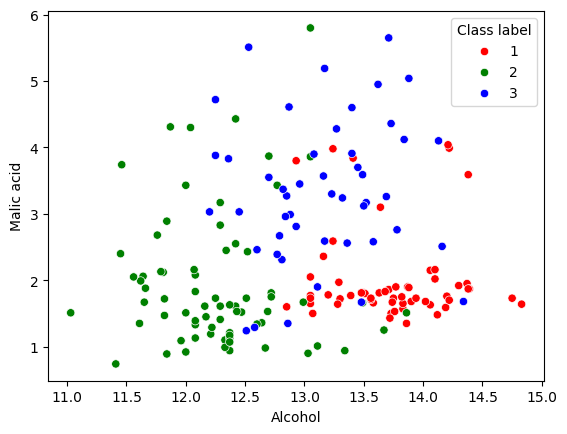

In [34]:
sns.scatterplot(x=df['Alcohol'],y=df['Malic acid'],hue=df['Class label'],palette =color_dict)

In [36]:
df.shape

(177, 3)

In [40]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(df.drop('Class label',axis=1),df['Class label'],test_size=0.3,random_state=0)

In [42]:
X_train.shape

(123, 2)

In [44]:
y_train.shape

(123,)

In [46]:
X_test.shape

(54, 2)

In [82]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)
np.round(X_train.describe(), 1)

,Alcohol,Malic acid
count,123.0,123.0
mean,13.0,2.3
std,0.8,1.2
min,11.0,0.9
25%,12.4,1.6
50%,13.0,1.8
75%,13.6,3.1
max,14.8,5.8


In [84]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler()

In [86]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [88]:
X_train_scaled

array([[0.48924731, 0.14460285],
       [0.15591398, 0.09368635],
       [0.60215054, 0.6904277 ],
       [0.57258065, 0.54582485],
       [0.66129032, 0.15682281],
       [0.48924731, 0.48472505],
       [0.66935484, 0.46435845],
       [0.76344086, 0.20570265],
       [0.21774194, 0.        ],
       [0.32795699, 0.78004073],
       [0.36021505, 0.03665988],
       [0.26075269, 0.51731161],
       [0.5188172 , 0.52138493],
       [0.36021505, 0.04887984],
       [0.89784946, 0.21588595],
       [0.34946237, 0.04276986],
       [0.20967742, 0.25050916],
       [0.33870968, 0.10590631],
       [0.54301075, 0.17922607],
       [0.83064516, 0.12016293],
       [0.1155914 , 0.58044807],
       [0.25      , 0.0407332 ],
       [0.46774194, 0.30549898],
       [0.65860215, 0.15885947],
       [0.40053763, 0.31364562],
       [0.37634409, 0.13034623],
       [0.37365591, 0.14663951],
       [0.51075269, 0.3910387 ],
       [0.31451613, 0.43584521],
       [0.75268817, 0.15478615],
       [0.

In [90]:
X_test_scaled.shape

(54, 2)

In [92]:
X_train_scaled=pd.DataFrame(X_train,columns=X_train.columns)

In [94]:
X_train_scaled

,Alcohol,Malic acid
22,12.85,1.60
108,11.61,1.35
174,13.27,4.28
144,13.16,3.57
71,13.49,1.66
...,...,...
103,12.51,1.73
67,13.34,0.94
117,12.77,3.43
47,14.10,2.02


In [96]:
X_test_scaled=pd.DataFrame(X_test,columns=X_test.columns)

In [98]:
import numpy as np

In [100]:
np.round(X_train.describe(), 1)

,Alcohol,Malic acid
count,123.0,123.0
mean,13.0,2.3
std,0.8,1.2
min,11.0,0.9
25%,12.4,1.6
50%,13.0,1.8
75%,13.6,3.1
max,14.8,5.8


In [102]:
np.round(X_train_scaled.describe(),1)

,Alcohol,Malic acid
count,123.0,123.0
mean,13.0,2.3
std,0.8,1.2
min,11.0,0.9
25%,12.4,1.6
50%,13.0,1.8
75%,13.6,3.1
max,14.8,5.8


X_train_scaled = scaler.fit_transform(X_train)
Yeh line ke baad X_train_scaled ek NumPy array ban jata hai.
np.round(X_train_scaled.describe(), 1) . toh describe() ka method lagta hi nahi hai, kyunki NumPy array mein .describe() hota hi nahi.

In [106]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [108]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)


In [110]:
print("Before Scaling:\n", np.round(X_train.describe(), 1))
print("\nAfter Scaling:\n", np.round(X_train_scaled.describe(), 1))


Before Scaling:
        Alcohol  Malic acid
count    123.0       123.0
mean      13.0         2.3
std        0.8         1.2
min       11.0         0.9
25%       12.4         1.6
50%       13.0         1.8
75%       13.6         3.1
max       14.8         5.8

After Scaling:
        Alcohol  Malic acid
count    123.0       123.0
mean       0.5         0.3
std        0.2         0.2
min        0.0         0.0
25%        0.4         0.1
50%        0.5         0.2
75%        0.7         0.4
max        1.0         1.0


fig → Poora figure (canvas)
ax1 → Pehla subplot (left side)
ax2 → Dusra subplot (right side)

### ax.scatter(x_values, y_values, optional_parameters)


In [119]:
import matplotlib.pyplot as plt

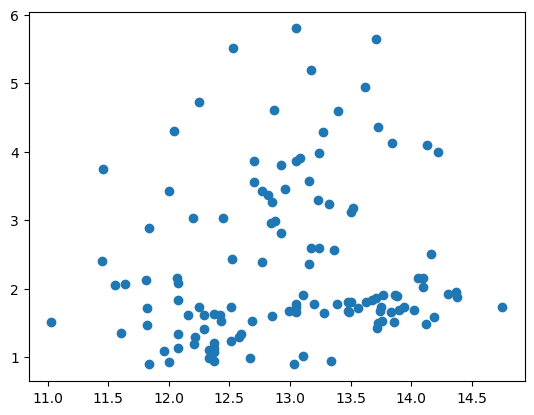

In [121]:
fig, ax3 = plt.subplots()
ax3.scatter(X_train['Alcohol'], X_train['Malic acid'])

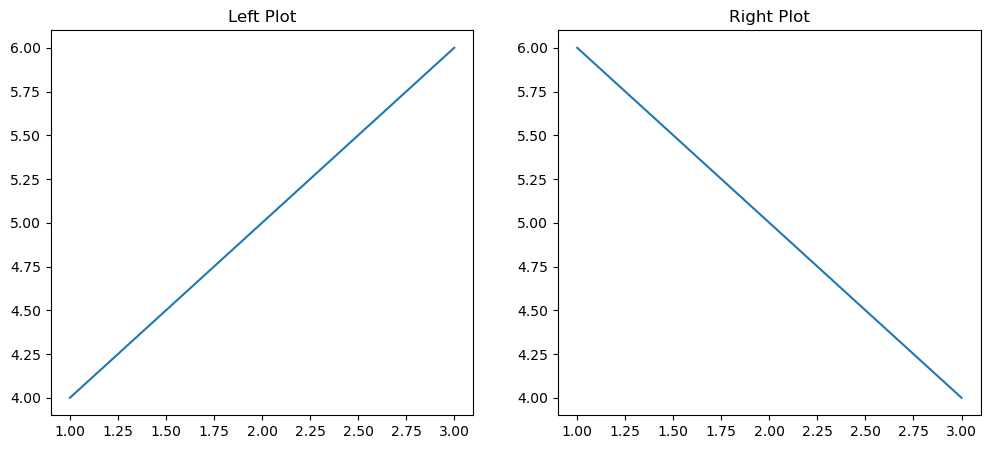

In [123]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.plot([1, 2, 3], [4, 5, 6])
ax1.set_title("Left Plot")

ax2.plot([1, 2, 3], [6, 5, 4])
ax2.set_title("Right Plot")

plt.show()


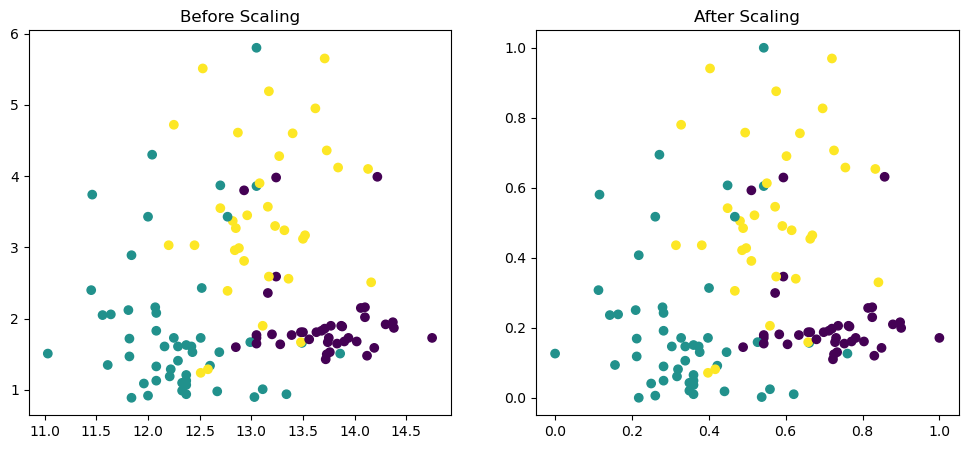

In [125]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Alcohol'], X_train['Malic acid'],c=y_train)
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Alcohol'], X_train_scaled['Malic acid'],c=y_train)
ax2.set_title("After Scaling")
plt.show()

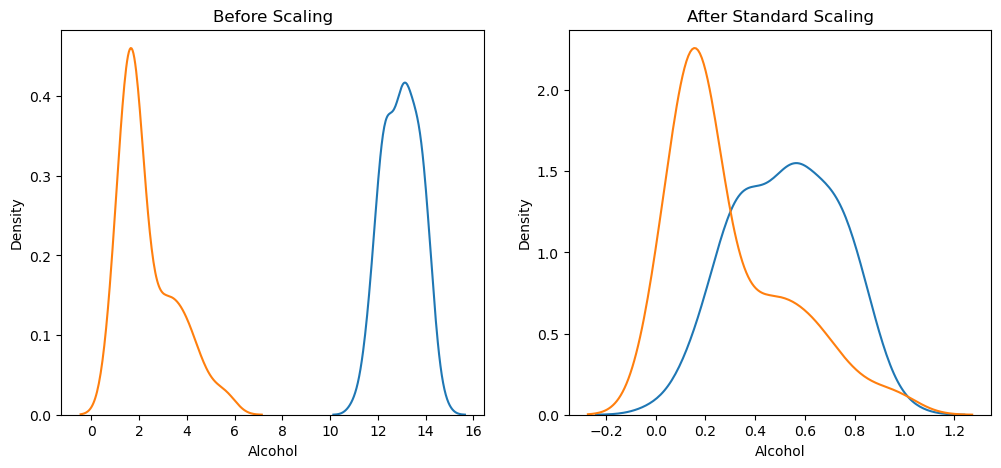

In [127]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Alcohol'], ax=ax1)
sns.kdeplot(X_train['Malic acid'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled['Alcohol'], ax=ax2)
sns.kdeplot(X_train_scaled['Malic acid'], ax=ax2)
plt.show()

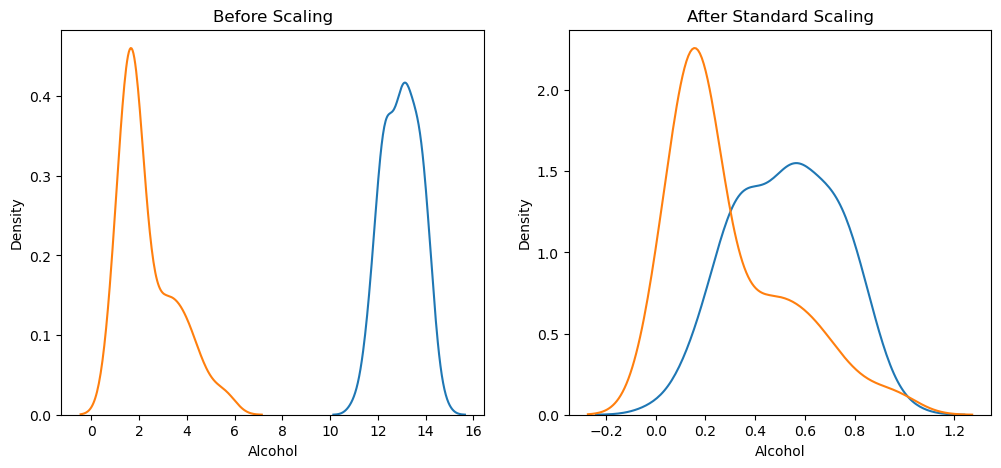

In [135]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Alcohol'], ax=ax1)
sns.kdeplot(X_train['Malic acid'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled['Alcohol'], ax=ax2)
sns.kdeplot(X_train_scaled['Malic acid'], ax=ax2)
plt.show()

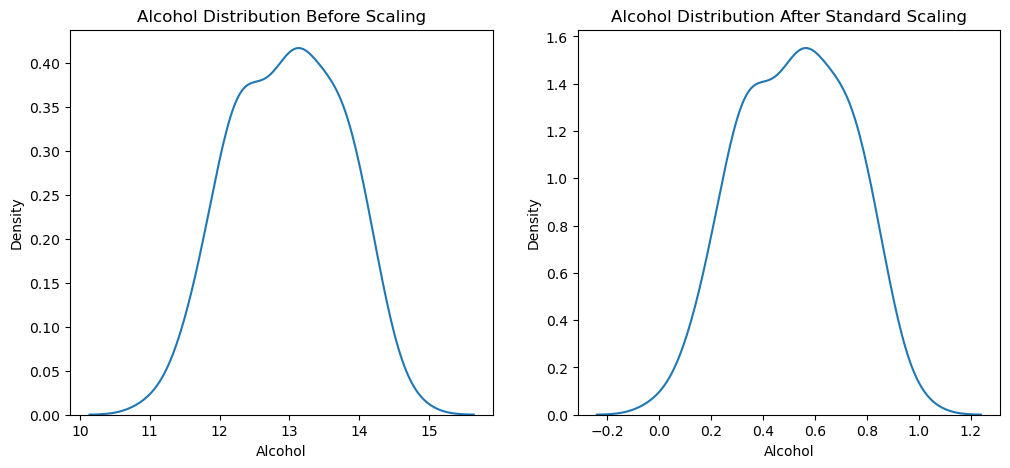

In [137]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Alcohol Distribution Before Scaling')
sns.kdeplot(X_train['Alcohol'], ax=ax1)

# after scaling
ax2.set_title('Alcohol Distribution After Standard Scaling')
sns.kdeplot(X_train_scaled['Alcohol'], ax=ax2)
plt.show()

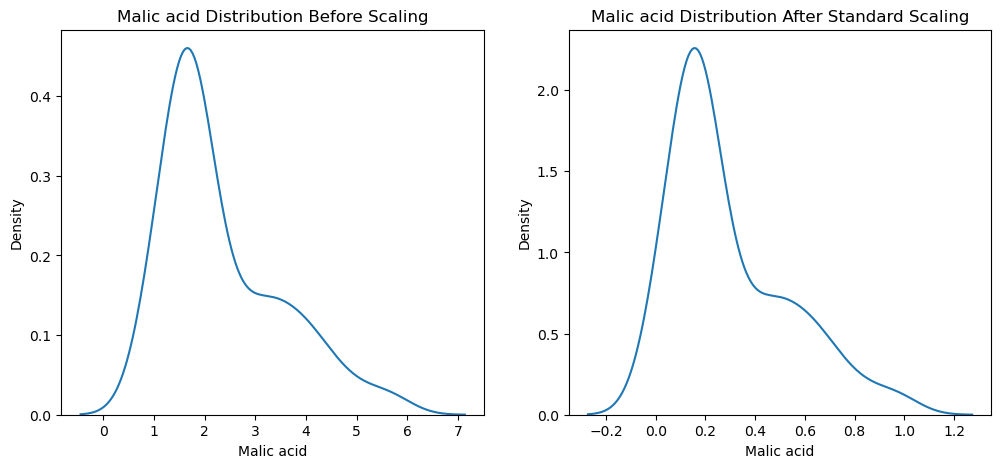

In [139]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Malic acid Distribution Before Scaling')
sns.kdeplot(X_train['Malic acid'], ax=ax1)

# after scaling
ax2.set_title('Malic acid Distribution After Standard Scaling')
sns.kdeplot(X_train_scaled['Malic acid'], ax=ax2)
plt.show()